In [1]:
from sklearn.manifold import TSNE
from model import MyModel
from build import build_dataset
from dataset import PrefixDataset1

import os
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import argparse

2023-03-11 10:46:43 | INFO | faiss.loader | Loading faiss with AVX2 support.
2023-03-11 10:46:43 | INFO | faiss.loader | Successfully loaded faiss with AVX2 support.


In [2]:
parser = argparse.ArgumentParser()

def get_args():
    parser = argparse.ArgumentParser()
    parser.add_argument('--lr', type=float, default=0.0003, help='Learning rate')
    parser.add_argument('--batch_size', type=int, default=64, help='batch size')
    parser.add_argument('--epochs', type=int, default=30, help='train epochs')
    parser.add_argument('--milestones', type=int, nargs='+', default=[116, 233], help='Milestones')
    parser.add_argument('--gamma', type=float, default=0.1, help='Gamma')
    # parser.add_argument('--optimizer', type=str, default='sgd', help='optimizer')

    parser.add_argument('--voc_len',type=int, default=42020, help='voc number')
    parser.add_argument('--embedding_dim',type=int, default=512, help='embedding size')
    parser.add_argument('--output_dim', type=int, default=64, help="output dim")
    parser.add_argument('--dstore_mmap',type=str, default='/data/zqh/NLP/adaptive-knn-mt/store/datastore/it')
    parser.add_argument('--dstore_size',type=int, default=3613350, help='datastore size')
    parser.add_argument('--use_cluster', type=bool, default=True, help="if use word cluster")
    parser.add_argument('--cluster_type', type=str, default='spectrum', help='cluster type')
    
    # contrastive learning
    parser.add_argument('--K', type=int, default=200, help='queue size')
    parser.add_argument('--m', type=float, default=0.999, help='momentum')
    

    # save
    parser.add_argument('--save_path', type=str, default='/data/zqh/adaptive-knn-mt/checkpoints/koran', help='save checkpoint dir')
    # dataset
    args = parser.parse_args([])
    return args


label 2, frequency 17979
label 3, frequency 3753
label 4, frequency 20228
label 5, frequency 16003
label 6, frequency 17535
label 7, frequency 5414
label 8, frequency 2937
label 9, frequency 10007
label 11, frequency 14398
label 12, frequency 4
label 13, frequency 79
label 14, frequency 4334
label 15, frequency 4354
label 16, frequency 8758
label 17, frequency 108
label 18, frequency 153
label 19, frequency 4824
label 20, frequency 6
label 22, frequency 6780
label 23, frequency 4381
label 24, frequency 4356
label 25, frequency 12
label 26, frequency 1669
label 28, frequency 71
label 30, frequency 2771
label 31, frequency 802
label 32, frequency 1136
label 33, frequency 3
label 34, frequency 6
label 35, frequency 113
label 36, frequency 30
label 38, frequency 3397
label 40, frequency 514
label 41, frequency 1340
label 42, frequency 3084
label 44, frequency 2960
label 45, frequency 992
label 47, frequency 1130
label 48, frequency 2594
label 50, frequency 225
label 51, frequency 8
label 5

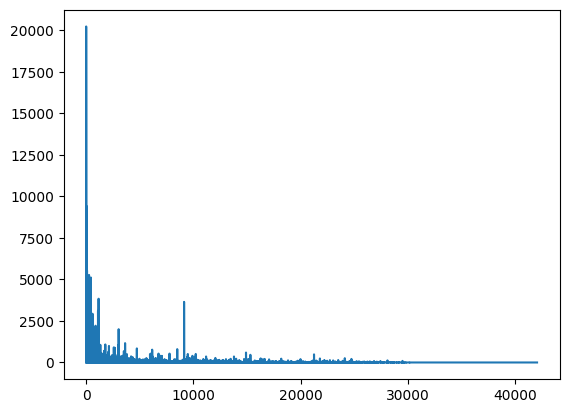

12.479772


In [13]:
args = get_args()
dataset = PrefixDataset1(args=args)


frequency_vals = [0 for i in range(args.voc_len)]
for i in dataset.label:
    frequency_vals[i] += 1

for i in range(args.voc_len):
    if frequency_vals[i] > 2:
        print(f"label {i}, frequency {frequency_vals[i]}")

plt.plot(np.arange(args.voc_len), frequency_vals)
plt.show()
print(np.float32(sum(frequency_vals)/args.voc_len))